In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torchvision import datasets, transforms
import torch
from tqdm import tqdm
from chromosome import Chromosome, FinalModel, SEARCH_SPACE
from generation import Generation

In [2]:
#download dataset cifar10
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
train_loader = torch.utils.data.DataLoader(trainset, **kwargs)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(testset, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
generation = Generation(fit_survival_rate = 0.3,
                        unfit_survival_rate = 0.1,
                        mutation_rate = 0.1,
                        pop_size = 10,
                        phase = 0,
                        search_space = SEARCH_SPACE,
                        prev_best = None,
                        train_loader = train_loader,
                        test_loader = test_loader)

  0%|          | 0/782 [00:00<?, ?it/s]

epoch 0 loss=1.4718210697174072 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 276.34it/s]


Validation accuracy: 40.04
Fitness calculated: 40.04


epoch 0 loss=1.919560432434082 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 293.57it/s] 


Validation accuracy: 36.0
Fitness calculated: 36.0


epoch 0 loss=1.262132167816162 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 364.41it/s] 


Validation accuracy: 58.42
Fitness calculated: 58.42


epoch 0 loss=1.1084496974945068 batch_id=781: 100%|██████████| 782/782 [00:03<00:00, 220.16it/s]


Validation accuracy: 46.04
Fitness calculated: 46.04


epoch 0 loss=1.8665052652359009 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 337.27it/s]


Validation accuracy: 45.2
Fitness calculated: 45.2


epoch 0 loss=0.9409502744674683 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 350.12it/s]


Validation accuracy: 51.18
Fitness calculated: 51.18


epoch 0 loss=2.038618326187134 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 311.54it/s] 


Validation accuracy: 40.74
Fitness calculated: 40.74


epoch 0 loss=1.6832951307296753 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 150.04it/s]


Validation accuracy: 55.22
Fitness calculated: 55.22


epoch 0 loss=0.5202199816703796 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 332.34it/s]


Validation accuracy: 53.01
Fitness calculated: 53.01


epoch 0 loss=1.791107416152954 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 349.03it/s] 


Validation accuracy: 45.13
Fitness calculated: 45.13


In [4]:
[i.fitness for i in generation.pop]

[40.04, 36.0, 58.42, 46.04, 45.2, 51.18, 40.74, 55.22, 53.01, 45.13]

In [5]:
generation.pop_size

10

In [6]:
generation.find_fittest().fitness

58.42

In [7]:
generation.find_fittest().model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
)

In [8]:
num_phases = 3
num_generations = 3

fitness_history = []

for p in range(num_phases):
    for g in range(num_generations):
        generation.generate()
        print(f"Fittest in phase {p} and generation {g}: {generation.find_fittest().fitness}\n\n")
        fitness_history.append({"p": p, "g": g, "fittest": generation.find_fittest().fitness})
    print(f"Fittest in phase {p} = {generation.find_fittest().fitness}\n\n")
    generation = Generation(0.3, 0.1,0.1, 10, p+1, SEARCH_SPACE, generation.find_fittest(), train_loader, test_loader)

epoch 0 loss=2.3643651008605957 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 292.89it/s]


Validation accuracy: 41.63
Fitness calculated: 41.63


epoch 0 loss=2.1910271644592285 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 135.36it/s]


Validation accuracy: 54.53
Fitness calculated: 54.53


epoch 0 loss=1.5502177476882935 batch_id=781: 100%|██████████| 782/782 [00:03<00:00, 219.23it/s]


Validation accuracy: 47.31
Fitness calculated: 47.31


epoch 0 loss=1.0998636484146118 batch_id=781: 100%|██████████| 782/782 [00:04<00:00, 166.45it/s]


Validation accuracy: 52.84
Fitness calculated: 52.84


epoch 0 loss=1.3524162769317627 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 383.08it/s]


Validation accuracy: 49.28
Fitness calculated: 49.28


epoch 0 loss=1.6683478355407715 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 371.60it/s]


Validation accuracy: 40.03
Fitness calculated: 40.03


epoch 0 loss=1.1547635793685913 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 355.81it/s]


Validation accuracy: 51.63
Fitness calculated: 51.63



Fittest in phase 0 and generation 0: 58.42




epoch 0 loss=1.1425389051437378 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 150.95it/s]


Validation accuracy: 61.06
Fitness calculated: 61.06


epoch 0 loss=1.3137913942337036 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 279.37it/s]


Validation accuracy: 42.56
Fitness calculated: 42.56


epoch 0 loss=1.039172649383545 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 351.68it/s] 


Validation accuracy: 54.27
Fitness calculated: 54.27


epoch 0 loss=1.3357919454574585 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 134.99it/s]


Validation accuracy: 51.08
Fitness calculated: 51.08


epoch 0 loss=0.8025450110435486 batch_id=781: 100%|██████████| 782/782 [00:03<00:00, 227.57it/s]


Validation accuracy: 55.86
Fitness calculated: 55.86


epoch 0 loss=1.6789098978042603 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 151.22it/s]


Validation accuracy: 59.3
Fitness calculated: 59.3


epoch 0 loss=1.431639552116394 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 352.20it/s] 


Validation accuracy: 57.84
Fitness calculated: 57.84



Fittest in phase 0 and generation 1: 61.06




epoch 0 loss=1.5951634645462036 batch_id=781: 100%|██████████| 782/782 [00:03<00:00, 211.81it/s]


Validation accuracy: 48.93
Fitness calculated: 48.93


epoch 0 loss=1.6240620613098145 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 367.88it/s]


Validation accuracy: 42.07
Fitness calculated: 42.07


epoch 0 loss=1.0979454517364502 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 334.84it/s]


Validation accuracy: 58.37
Fitness calculated: 58.37


epoch 0 loss=1.2972533702850342 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 317.45it/s]


Validation accuracy: 56.41
Fitness calculated: 56.41


epoch 0 loss=1.7241268157958984 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 151.17it/s]


Validation accuracy: 60.53
Fitness calculated: 60.53


epoch 0 loss=1.1593817472457886 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 333.14it/s]


Validation accuracy: 60.47
Fitness calculated: 60.47


epoch 0 loss=1.2448192834854126 batch_id=781: 100%|██████████| 782/782 [00:02<00:00, 309.37it/s]


Validation accuracy: 56.39
Fitness calculated: 56.39



Fittest in phase 0 and generation 2: 61.06


Fittest in phase 0 = 61.06




epoch 0 loss=1.3202202320098877 batch_id=781: 100%|██████████| 782/782 [00:09<00:00, 79.72it/s]


Validation accuracy: 62.75
Fitness calculated: 62.75


epoch 0 loss=0.5754390358924866 batch_id=781: 100%|██████████| 782/782 [00:09<00:00, 78.75it/s]


Validation accuracy: 65.41
Fitness calculated: 65.41


epoch 0 loss=1.341479778289795 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 76.42it/s] 


Validation accuracy: 64.66
Fitness calculated: 64.66


epoch 0 loss=0.8889902830123901 batch_id=781: 100%|██████████| 782/782 [00:09<00:00, 78.59it/s]


Validation accuracy: 64.55
Fitness calculated: 64.55


epoch 0 loss=1.8140907287597656 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 137.74it/s]


Validation accuracy: 46.73
Fitness calculated: 46.73


epoch 0 loss=1.3073726892471313 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 144.24it/s]


Validation accuracy: 63.28
Fitness calculated: 63.28


epoch 0 loss=0.8589540719985962 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 145.12it/s]


Validation accuracy: 63.67
Fitness calculated: 63.67


epoch 0 loss=1.23557710647583 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 136.86it/s]  


Validation accuracy: 66.83
Fitness calculated: 66.83


epoch 0 loss=1.3066489696502686 batch_id=781: 100%|██████████| 782/782 [00:09<00:00, 79.78it/s]


Validation accuracy: 63.31
Fitness calculated: 63.31


epoch 0 loss=0.8456137180328369 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 73.85it/s]


Validation accuracy: 69.6
Fitness calculated: 69.6


epoch 0 loss=1.0437737703323364 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 78.13it/s]


Validation accuracy: 66.3
Fitness calculated: 66.3


epoch 0 loss=0.948192298412323 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 75.40it/s] 


Validation accuracy: 67.3
Fitness calculated: 67.3


epoch 0 loss=1.042250156402588 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 75.91it/s] 


Validation accuracy: 69.29
Fitness calculated: 69.29


epoch 0 loss=1.3467646837234497 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 77.50it/s]


Validation accuracy: 68.62
Fitness calculated: 68.62


epoch 0 loss=0.8387435674667358 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 131.95it/s]


Validation accuracy: 65.09
Fitness calculated: 65.09


epoch 0 loss=1.037901520729065 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 77.72it/s] 


Validation accuracy: 68.57
Fitness calculated: 68.57


epoch 0 loss=1.0260143280029297 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 76.25it/s] 


Validation accuracy: 67.91
Fitness calculated: 67.91



Fittest in phase 1 and generation 0: 69.6




epoch 0 loss=1.7092278003692627 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 141.59it/s]


Validation accuracy: 47.28
Fitness calculated: 47.28


epoch 0 loss=1.0581629276275635 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 77.76it/s]


Validation accuracy: 68.65
Fitness calculated: 68.65


epoch 0 loss=1.0772250890731812 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 143.54it/s]


Validation accuracy: 68.84
Fitness calculated: 68.84


epoch 0 loss=0.9758192300796509 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 138.14it/s]


Validation accuracy: 62.31
Fitness calculated: 62.31


epoch 0 loss=1.1240144968032837 batch_id=781: 100%|██████████| 782/782 [00:09<00:00, 78.48it/s]


Validation accuracy: 67.04
Fitness calculated: 67.04


epoch 0 loss=1.1672219038009644 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 141.37it/s]


Validation accuracy: 56.8
Fitness calculated: 56.8


epoch 0 loss=0.9138790965080261 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 77.44it/s] 


Validation accuracy: 67.27
Fitness calculated: 67.27



Fittest in phase 1 and generation 1: 69.6




epoch 0 loss=1.4924311637878418 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 141.64it/s]


Validation accuracy: 49.5
Fitness calculated: 49.5


epoch 0 loss=0.8035723567008972 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 77.91it/s]


Validation accuracy: 68.63
Fitness calculated: 68.63


epoch 0 loss=1.3097771406173706 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 141.54it/s] 


Validation accuracy: 71.51
Fitness calculated: 71.51


epoch 0 loss=1.1565558910369873 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 135.73it/s]


Validation accuracy: 66.78
Fitness calculated: 66.78


epoch 0 loss=1.0953950881958008 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 77.08it/s]


Validation accuracy: 69.43
Fitness calculated: 69.43


epoch 0 loss=0.6737872958183289 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 76.45it/s]


Validation accuracy: 72.14
Fitness calculated: 72.14


epoch 0 loss=0.7528569102287292 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 76.17it/s]


Validation accuracy: 71.79
Fitness calculated: 71.79



Fittest in phase 1 and generation 2: 72.14


Fittest in phase 1 = 72.14




epoch 0 loss=0.6671825051307678 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 126.41it/s] 


Validation accuracy: 70.95
Fitness calculated: 70.95


epoch 0 loss=1.316541314125061 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 72.11it/s]  


Validation accuracy: 72.82
Fitness calculated: 72.82


epoch 0 loss=1.066827654838562 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 136.04it/s]  


Validation accuracy: 72.79
Fitness calculated: 72.79


epoch 0 loss=1.1984128952026367 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 72.82it/s] 


Validation accuracy: 73.82
Fitness calculated: 73.82


epoch 0 loss=0.8093590140342712 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 134.64it/s] 


Validation accuracy: 73.62
Fitness calculated: 73.62


epoch 0 loss=0.8186708092689514 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 135.43it/s] 


Validation accuracy: 73.9
Fitness calculated: 73.9


epoch 0 loss=0.4563370943069458 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 126.59it/s] 


Validation accuracy: 73.67
Fitness calculated: 73.67


epoch 0 loss=0.6931129097938538 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 70.79it/s] 


Validation accuracy: 74.81
Fitness calculated: 74.81


epoch 0 loss=0.8144184947013855 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 70.81it/s] 


Validation accuracy: 73.38
Fitness calculated: 73.38


epoch 0 loss=1.0642181634902954 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 123.03it/s] 


Validation accuracy: 73.9
Fitness calculated: 73.9


epoch 0 loss=0.5309423804283142 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 124.30it/s] 


Validation accuracy: 75.18
Fitness calculated: 75.18


epoch 0 loss=0.8464568853378296 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 135.73it/s] 


Validation accuracy: 76.1
Fitness calculated: 76.1


epoch 0 loss=0.824128270149231 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 130.51it/s]  


Validation accuracy: 75.5
Fitness calculated: 75.5


epoch 0 loss=0.9088110327720642 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 127.99it/s] 


Validation accuracy: 76.3
Fitness calculated: 76.3


epoch 0 loss=0.47488147020339966 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 133.20it/s]


Validation accuracy: 73.95
Fitness calculated: 73.95


epoch 0 loss=0.7216953635215759 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 70.38it/s] 


Validation accuracy: 75.12
Fitness calculated: 75.12


epoch 0 loss=0.6816130876541138 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 72.74it/s] 


Validation accuracy: 76.52
Fitness calculated: 76.52



Fittest in phase 2 and generation 0: 76.52




epoch 0 loss=0.8459030389785767 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 128.82it/s] 


Validation accuracy: 75.75
Fitness calculated: 75.75


epoch 0 loss=0.7185108661651611 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 129.15it/s] 


Validation accuracy: 76.47
Fitness calculated: 76.47


epoch 0 loss=0.427661269903183 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 131.06it/s]  


Validation accuracy: 76.78
Fitness calculated: 76.78


epoch 0 loss=0.8130214214324951 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 68.19it/s] 


Validation accuracy: 75.27
Fitness calculated: 75.27


epoch 0 loss=0.43137115240097046 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 132.92it/s]


Validation accuracy: 76.18
Fitness calculated: 76.18


epoch 0 loss=0.43535691499710083 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 68.21it/s]


Validation accuracy: 75.58
Fitness calculated: 75.58


epoch 0 loss=0.704795241355896 batch_id=781: 100%|██████████| 782/782 [00:06<00:00, 127.52it/s]  


Validation accuracy: 77.05
Fitness calculated: 77.05



Fittest in phase 2 and generation 1: 77.05




epoch 0 loss=0.39190438389778137 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 69.81it/s]


Validation accuracy: 76.87
Fitness calculated: 76.87


epoch 0 loss=0.47354963421821594 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 70.75it/s]


Validation accuracy: 76.3
Fitness calculated: 76.3


epoch 0 loss=1.2367502450942993 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 68.13it/s] 


Validation accuracy: 76.36
Fitness calculated: 76.36


epoch 0 loss=0.6782707571983337 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 72.50it/s] 


Validation accuracy: 76.74
Fitness calculated: 76.74


epoch 0 loss=0.6299311518669128 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 73.06it/s] 


Validation accuracy: 77.33
Fitness calculated: 77.33


epoch 0 loss=0.46156448125839233 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 68.34it/s]


Validation accuracy: 76.11
Fitness calculated: 76.11


epoch 0 loss=0.7678913474082947 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 71.87it/s] 


Validation accuracy: 76.73
Fitness calculated: 76.73



Fittest in phase 2 and generation 2: 77.33


Fittest in phase 2 = 77.33




epoch 0 loss=0.4934515655040741 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 70.80it/s] 


Validation accuracy: 77.13
Fitness calculated: 77.13


epoch 0 loss=0.5708448886871338 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 69.32it/s] 


Validation accuracy: 76.44
Fitness calculated: 76.44


epoch 0 loss=0.3829769194126129 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 132.51it/s] 


Validation accuracy: 77.79
Fitness calculated: 77.79


epoch 0 loss=0.23362997174263 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 71.42it/s]   


Validation accuracy: 76.51
Fitness calculated: 76.51


epoch 0 loss=0.2683238089084625 batch_id=781: 100%|██████████| 782/782 [00:05<00:00, 133.10it/s] 


Validation accuracy: 76.24
Fitness calculated: 76.24


epoch 0 loss=0.4708569347858429 batch_id=781: 100%|██████████| 782/782 [00:10<00:00, 71.30it/s] 


Validation accuracy: 76.24
Fitness calculated: 76.24


epoch 0 loss=0.33667871356010437 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 70.02it/s]


Validation accuracy: 77.13
Fitness calculated: 77.13


epoch 0 loss=0.33585432171821594 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 68.96it/s]


Validation accuracy: 76.34
Fitness calculated: 76.34


epoch 0 loss=0.30893516540527344 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 66.21it/s]


Validation accuracy: 76.43
Fitness calculated: 76.43


epoch 0 loss=0.9664849042892456 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 69.68it/s] 


Validation accuracy: 76.24
Fitness calculated: 76.24


In [9]:
# num_generations = 2
# print("Initial population size: ", 10)
# for g in range(1, num_generations+1):
#     generation.generate()
#     fittest = generation.find_fittest()
#     print(f"Max fitness in generation {g} is {fittest.fitness}")
#     print(f"Population size: {generation.pop_size}")
random_genes = {
    'k_size_a': 3,
    'k_size_b': 3,
    'out_channels_a': 16,
    'out_channels_b': 16,
    'include_pool_a': True,
    'include_pool_b': True,
    'pool_type_a': 'max_pooling',
    'pool_type_b': 'max_pooling',
    'activation_type_a': 'relu',
    'activation_type_b': 'relu',
    'include_b': True,
    'include_BN_a': True,
    'include_BN_b': True,
    'skip_connection': True,
}
print(generation.find_fittest().genes)
test = Chromosome(1,generation.find_fittest(),random_genes,train_loader,test_loader)

{'k_size_a': 3, 'k_size_b': 3, 'out_channels_a': 16, 'out_channels_b': 32, 'include_pool_a': False, 'include_pool_b': False, 'pool_type_a': 'avg_pooling', 'pool_type_b': 'avg_pooling', 'activation_type_a': 'selu', 'activation_type_b': 'elu', 'include_b': False, 'include_BN_a': False, 'include_BN_b': False, 'skip_connection': False}


epoch 0 loss=0.38444438576698303 batch_id=781: 100%|██████████| 782/782 [00:11<00:00, 68.85it/s]


Validation accuracy: 76.14
Fitness calculated: 76.14


In [10]:
generation.find_fittest().fitness

77.79

In [13]:
generation.find_fittest().model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
        (1): Tanh()
        (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
        (4): ReLU()
        (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (2): ReLU()
    )
    (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
    (2): Tanh()
  )
  (1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (2): Tanh()
)

In [11]:
for i in generation.pop:
    print(i.fitness)

77.79
77.13
77.13
76.51
76.44
76.43
76.34
76.24
76.24
76.24


In [19]:
l = []

for i in fitness_history:
    l.append(i['fittest'])

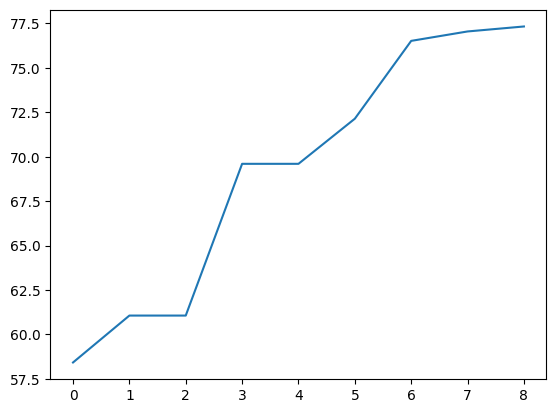

In [20]:
import matplotlib.pyplot as plt

plt.plot(l)
plt.show()